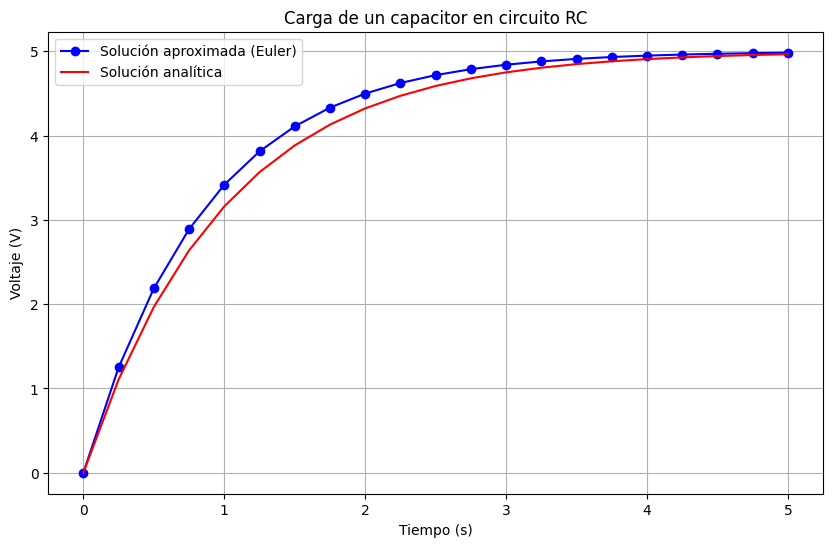

In [2]:
#   Codigo que implementa el metodo de Euler
#   para resolver una ecuacion diferencial
#
#
#           Autor:
#   Cristian Yuseff Pinto Villanueva
#   cristian.pino984@gmail.com
#   Version 1.0 : 29/04/2025
#
# EJERCICIO 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del circuito RC
R = 1000  # Resistencia en Ohmios
C = 0.001  # Capacitancia en Faradios
V_fuente = 5  # Voltaje de la fuente en Voltios

# Definición de la EDO: dV/dt = f(t, V)
def f(t, V):
    return (1/(R*C)) * (V_fuente - V)

# Condiciones iniciales
t0 = 0
V0 = 0
tf = 5  # Intervalo de tiempo en segundos
n = 20  # Número de pasos

# Paso de tiempo
h = (tf - t0) / n

# Inicialización de listas para almacenar resultados
t_vals = [t0]
V_vals = [V0]

# Método de Euler
t = t0
V = V0
for i in range(n):
    V = V + h * f(t, V)
    t = t + h
    t_vals.append(t)
    V_vals.append(V)

# Solución analítica para comparación
def solucion_analitica(t):
    return V_fuente * (1 - np.exp(-t/(R*C)))

# Calcular solución analítica en los mismos puntos
V_analitica = [solucion_analitica(t) for t in t_vals]

# Guardar resultados en archivo CSV
data = {
    "t": t_vals,
    "V_aproximada": V_vals,
    "V_analitica": V_analitica
}
df = pd.DataFrame(data)
csv_path = "rc_circuito_resultados.csv"
df.to_csv(csv_path, index=False)

# Graficar ambas soluciones
plt.figure(figsize=(10, 6))
plt.plot(t_vals, V_vals, 'o-', label='Solución aproximada (Euler)', color='blue')
plt.plot(t_vals, V_analitica, '-', label='Solución analítica', color='red')
plt.title('Carga de un capacitor en circuito RC')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()
image_path = "rc_circuito_solucion.png"
plt.savefig(image_path)
plt.show()


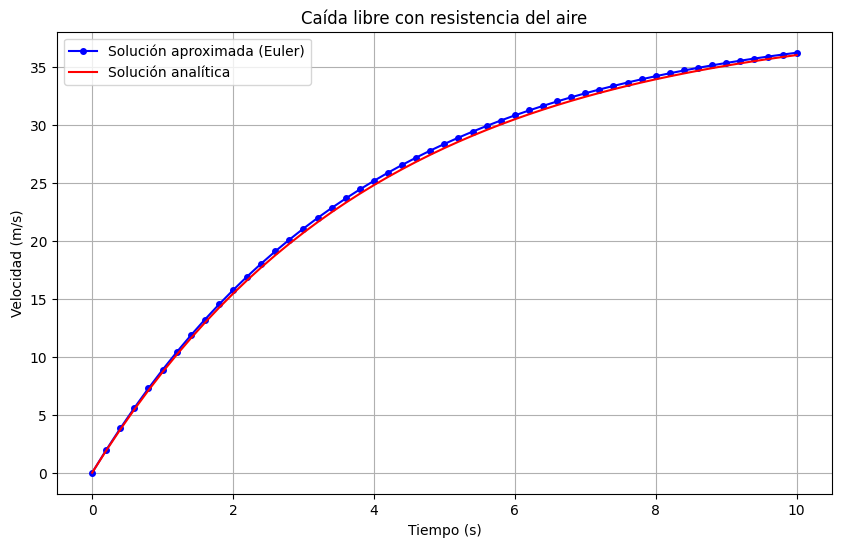

In [3]:
# EJERCICIO 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros físicos
g = 9.81  # Aceleración gravitacional (m/s²)
m = 2     # Masa del objeto (kg)
k = 0.5   # Coeficiente de resistencia del aire (kg/s)

# Definición de la EDO: dv/dt = f(t, v)
def f(t, v):
    return g - (k/m) * v

# Condiciones iniciales
t0 = 0
v0 = 0
tf = 10  # Intervalo de tiempo en segundos
n = 50   # Número de pasos

# Paso de tiempo
h = (tf - t0) / n

# Inicialización de listas para almacenar resultados
t_vals = [t0]
v_vals = [v0]

# Método de Euler
t = t0
v = v0
for i in range(n):
    v = v + h * f(t, v)
    t = t + h
    t_vals.append(t)
    v_vals.append(v)

# Solución analítica para comparación
def solucion_analitica(t):
    return (m*g)/k * (1 - np.exp(-(k/m)*t))

# Calcular solución analítica en los mismos puntos
v_analitica = [solucion_analitica(t) for t in t_vals]

# Guardar resultados en archivo CSV
data = {
    "Tiempo (s)": t_vals,
    "Velocidad Aproximada (m/s)": v_vals,
    "Velocidad Analítica (m/s)": v_analitica
}
df = pd.DataFrame(data)
csv_path = "caida_libre_resultados.csv"
df.to_csv(csv_path, index=False)

# Graficar ambas soluciones
plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_vals, 'o-', label='Solución aproximada (Euler)', markersize=4, color='blue')
plt.plot(t_vals, v_analitica, '-', label='Solución analítica', color='red')
plt.title('Caída libre con resistencia del aire')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid(True)
plt.legend()
image_path = "caida_libre_solucion.png"
plt.savefig(image_path)
plt.show()

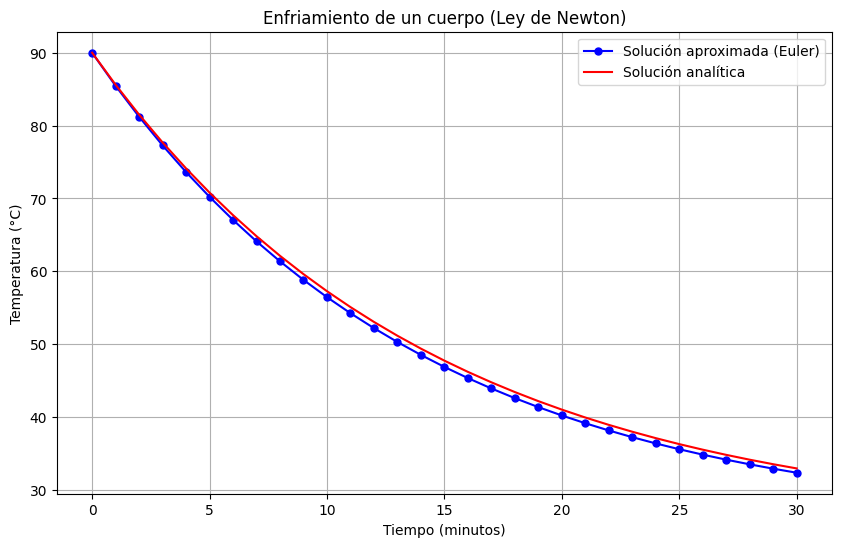

In [4]:
#EJERCICIO 3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del enfriamiento
k = 0.07       # Coeficiente de enfriamiento
T_amb = 25     # Temperatura ambiente (°C)

# Definición de la EDO: dT/dt = f(t, T)
def f(t, T):
    return -k * (T - T_amb)

# Condiciones iniciales
t0 = 0
T0 = 90        # Temperatura inicial (°C)
tf = 30        # Intervalo de tiempo en minutos
n = 30         # Número de pasos

# Paso de tiempo
h = (tf - t0) / n

# Inicialización de listas para almacenar resultados
t_vals = [t0]
T_vals = [T0]

# Método de Euler
t = t0
T = T0
for i in range(n):
    T = T + h * f(t, T)
    t = t + h
    t_vals.append(t)
    T_vals.append(T)

# Solución analítica para comparación
def solucion_analitica(t):
    return T_amb + (T0 - T_amb) * np.exp(-k * t)

# Calcular solución analítica en los mismos puntos
T_analitica = [solucion_analitica(t) for t in t_vals]

# Guardar resultados en archivo CSV
data = {
    "Tiempo (min)": t_vals,
    "Temperatura Aproximada (°C)": T_vals,
    "Temperatura Analítica (°C)": T_analitica
}
df = pd.DataFrame(data)
csv_path = "enfriamiento_resultados.csv"
df.to_csv(csv_path, index=False)

# Graficar ambas soluciones
plt.figure(figsize=(10, 6))
plt.plot(t_vals, T_vals, 'o-', label='Solución aproximada (Euler)', markersize=5, color='blue')
plt.plot(t_vals, T_analitica, '-', label='Solución analítica', color='red')
plt.title('Enfriamiento de un cuerpo (Ley de Newton)')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
image_path = "enfriamiento_solucion.png"
plt.savefig(image_path)
plt.show()